In [15]:
# Experiement on DNN with 

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('./cleaned_numeric_data.csv')
X = data.drop(columns=['Overall']).values
y = data['Overall'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Pytorch tensor for processing
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

Epoch [100/1000], Loss: 5.7455, Val Loss: 5.6202
Epoch [200/1000], Loss: 2.2997, Val Loss: 2.3020
Epoch [300/1000], Loss: 2.2043, Val Loss: 2.2086
Epoch [400/1000], Loss: 2.1881, Val Loss: 2.1926
Epoch [500/1000], Loss: 2.1812, Val Loss: 2.1858
Epoch [600/1000], Loss: 2.1780, Val Loss: 2.1828
Epoch [700/1000], Loss: 2.1765, Val Loss: 2.1813
Epoch [800/1000], Loss: 2.1758, Val Loss: 2.1807
Epoch [900/1000], Loss: 2.1754, Val Loss: 2.1804
Epoch [1000/1000], Loss: 2.1753, Val Loss: 2.1803


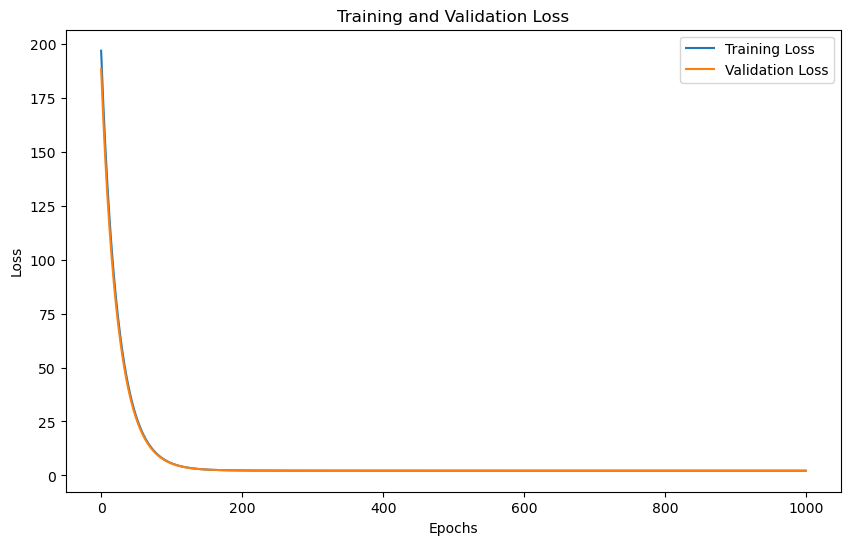

Mean Squared Error on test set: 2.1803
Root Mean Squared Error on test set: 1.4766
R-squared on test set: 0.8060


In [17]:
# Define the regression model with one linear layer
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Initialize lists to store loss values
train_losses = []
val_losses = []

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    train_losses.append(loss.item())
    
    loss.backward()
    optimizer.step()
    
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test_tensor)
        val_loss = criterion(val_outputs, y_test_tensor)
        val_losses.append(val_loss.item())
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.plot(range(num_epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = criterion(predictions, y_test_tensor)
    print(f'Mean Squared Error on test set: {mse.item():.4f}')
    rmse = torch.sqrt(mse)
    print(f'Root Mean Squared Error on test set: {rmse.item():.4f}')
    r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())
    print(f'R-squared on test set: {r2:.4f}')


In [11]:
from sklearn.metrics import r2_score

# Calculate RMSE
rmse = torch.sqrt(mse)
print(f'Root Mean Squared Error on test set: {rmse.item():.4f}')

# Calculate R-squared
r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())
print(f'R-squared on test set: {r2:.4f}')

Root Mean Squared Error on test set: 1.4765
R-squared on test set: 0.8060


In [13]:
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.layer3(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    mse = criterion(predictions, y_test_tensor)
    print(f'Mean Squared Error on test set: {mse.item():.4f}')

# Calculate RMSE and R-squared
rmse = torch.sqrt(mse)
print(f'Root Mean Squared Error on test set: {rmse.item():.4f}')

from sklearn.metrics import r2_score
r2 = r2_score(y_test_tensor.numpy(), predictions.numpy())
print(f'R-squared on test set: {r2:.4f}')

Epoch [10/200], Loss: 174.8066
Epoch [20/200], Loss: 166.9986
Epoch [30/200], Loss: 156.8159
Epoch [40/200], Loss: 143.6151
Epoch [50/200], Loss: 127.1118
Epoch [60/200], Loss: 107.4963
Epoch [70/200], Loss: 85.8445
Epoch [80/200], Loss: 64.5056
Epoch [90/200], Loss: 46.4890
Epoch [100/200], Loss: 34.2665
Epoch [110/200], Loss: 27.7251
Epoch [120/200], Loss: 24.0121
Epoch [130/200], Loss: 20.9002
Epoch [140/200], Loss: 18.0999
Epoch [150/200], Loss: 15.7083
Epoch [160/200], Loss: 13.6779
Epoch [170/200], Loss: 11.9456
Epoch [180/200], Loss: 10.4736
Epoch [190/200], Loss: 9.2164
Epoch [200/200], Loss: 8.1538
Mean Squared Error on test set: 8.0653
Root Mean Squared Error on test set: 2.8400
R-squared on test set: 0.2825
